# Natural Language Processing Workshop pt.1

In [1]:
from sklearn.feature_extraction.text import (TfidfVectorizer,
                                             CountVectorizer)
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
from nltk import FreqDist
import pandas as pd
from nltk.text import Text
from nltk.text import ContextIndex
from nltk.text import ConcordanceIndex
from sklearn.cluster import KMeans
import string
import re

In [34]:

# # Nice string
# text = 'Ala ma kota'
# print(text)

# # format method
# text = 'Ala ma {}'.format('kota')
# print(text)

# # hashing method
# print('Ala ma %s' %'kota')
# print('Ala ma %i %s' %(2,'koty'))


# # fstring
# pet = 'kot'
# print(f'Ali zwierzak to {pet}')

# # Lowering
# print(text.lower())

# regular expressions
reg = re.findall(r'[^a-zA-z]',text)
print(f'W zdaniu są takie znaki poza znakami: {reg}')
# regular expressions
reg = re.findall(r'[^a-zA-z]',text)
print(f'W zdaniu są takie znaki poza znakami: {reg}')
#zamienimy wszystkie a na u
reg = re.sub(r'[a]','u',text)
print(f'Zdanie bez u to : {reg}')
reg.lower()


W zdaniu są takie znaki poza znakami: [' ', ' ']
W zdaniu są takie znaki poza znakami: [' ', ' ']
Zdanie bez u to : Alu mu kotu


'alu mu kotu'

In [52]:

# Nice string
text = 'Ala ma kota'
print(text)

# format method
text = 'Ala ma {}'.format('kota')
print(text)

# hashing method
print('Ala ma %s' %'kota')
print('Ala ma %i %s' %(2,'koty'))

# fstring
pet = 'kot'
print(f'Ali zwierzak to {pet}')

# Lowering
print(text.lower())

# regular expressions
reg = re.findall(r'[^a-zA-z]',text)
print(f'W zdaniu są takie znaki poza znakami: {reg}')

#zamienimy wszystkie a na u
reg = re.sub(r'[a]','u',text)
print(f'Zdanie bez małych liter to : {reg}')

#łączenie elementów listy poprzez symbol
print('Ala ma, a ja nie mam .'.split(' '))
print('   '.join([text,reg]))

#Stopwords dla angielskiego:
print(stopwords.words('french'))

Ala ma kota
Ala ma kota
Ala ma kota
Ala ma 2 koty
Ali zwierzak to kot
ala ma kota
W zdaniu są takie znaki poza znakami: [' ', ' ']
Zdanie bez małych liter to : Alu mu kotu
['Ala', 'ma,', 'a', 'ja', 'nie', 'mam', '.']
Ala ma kota   Alu mu kotu
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soy

In [54]:
#Defining function for cleaning data
def preparing_stories(stories_list):
    result_list = list()
    for n in stories_list:
        
        #Getting rid of interpunction
        result = re.sub("[^a-zA-Z]"," ",n)
        #Lowering data to avoid problems wit case sensitivity
        result = result.lower()
        #Creating list of all words
        result = result.split(' ')
        #Rejecting words that occurs too often
        result = [w for w in result if w not in stopwords.words('english')]
        #Joining words into one string, getting rid of empty elements
        result = ' '.join([n for n in result if n != ''])
        #Appending processed data to results
        result_list.append(result)
    return result_list


In [55]:

with open('fed_papers.txt','r') as file:
    raw = file.read()
    
dataset = raw.split('FEDERALIST No.')

#make data short because... time limits and stuff

dataset = [n[:300] for n in dataset]
data = preparing_stories(dataset)



In [5]:

print(f'Surowe dane to:\n {dataset[:2]}')
print(f'\n \nZaś wyczyszczone to : \n{data[:2]}')

Surowe dane to:
 ['The Project Gutenberg EBook of The Federalist Papers, by \nAlexander Hamilton and John Jay and James Madison\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg Licens', ' 2\n\n\nConcerning Dangers from Foreign Force and Influence\n\nFor the Independent Journal.\n\nJAY\n\n\n\nTo the People of the State of New York:\n\nWHEN the people of America reflect that they are now called upon\nto decide a question, which, in its consequences, must prove one of\nthe most important that ever en']

 
Zaś wyczyszczone to : 
['project gutenberg ebook federalist papers alexander hamilton john jay james madison ebook use anyone anywhere cost almost restrictions whatsoever may copy give away use terms project gutenberg licens', 'concerning dangers foreign force influence independent journal jay people state new york people america reflect called upon

In [59]:

def array_words(stories_list):
    #Calling vectorizer
    count = CountVectorizer(analyzer='word',tokenizer=None,
                      preprocessor = None,max_features = 5000)
#     count = TfidfVectorizer(analyzer='word',tokenizer=None,
#                       preprocessor = None,max_features = 5000)
    stories = preparing_stories(stories_list)
    
    transformed = count.fit_transform(stories)
    
    feature_array = transformed.toarray()
    
    feature_name = count.get_feature_names()
    
    return feature_name,feature_array

In [60]:
word_dict,feature_array = array_words(data)


In [61]:
print(f'Shape of feature array is {feature_array.shape}')
print(f'Lenght of dictionary containing features is {len(word_dict)}')

Shape of feature array is (83, 596)
Lenght of dictionary containing features is 596


In [62]:
# plt.scatter(feature_array[:,0:20],feature_array[:,20:40])
# plt.scatter(feature_array[:,80:100],feature_array[:,60:80])

In [64]:
X = feature_array
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
res = kmeans.labels_
res

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
for n in np.unique(res):
    print(f'Do klasy {n} należy {np.count_nonzero(np.where(res == n))} instancji')

Do klasy 0 należy 49 instancji
Do klasy 1 należy 27 instancji
Do klasy 2 należy 6 instancji


# NLTK

In [66]:
from nltk.book import *
import nltk.chat as chat

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [67]:
text1.similar('Starbuck')
# text6.similar('king')

stubb ahab it he that all queequeg him there me as hand them what
which this by i now you


In [14]:
text6.concordance('knight')

Displaying 25 of 84 matches:
: Man ! ARTHUR : Man . Sorry . What knight live in that castle over there ? DE
rthur music ] [ music stops ] BLACK KNIGHT : Aaagh ! [ King Arthur music ] [ m
rthur music ] [ music stops ] BLACK KNIGHT : Aaagh ! GREEN KNIGHT : Ooh ! [ Ki
tops ] BLACK KNIGHT : Aaagh ! GREEN KNIGHT : Ooh ! [ King Arthur music ] [ mus
ic ] [ music stops ] [ stab ] BLACK KNIGHT : Aagh ! GREEN KNIGHT : Oh ! [ King
 stab ] BLACK KNIGHT : Aagh ! GREEN KNIGHT : Oh ! [ King Arthur music ] Ooh ! 
music ] Ooh ! [ music stops ] BLACK KNIGHT : Aaagh ! [ clang ] BLACK KNIGHT an
CK KNIGHT : Aaagh ! [ clang ] BLACK KNIGHT and GREEN KNIGHT : Agh !, oh !, etc
 ! [ clang ] BLACK KNIGHT and GREEN KNIGHT : Agh !, oh !, etc . GREEN KNIGHT :
N KNIGHT : Agh !, oh !, etc . GREEN KNIGHT : Aaaaaah ! Aaaaaaaaah ! [ woosh ] 
ah ! Aaaaaaaaah ! [ woosh ] [ BLACK KNIGHT kills GREEN KNIGHT ] [ thud ] [ scr
 woosh ] [ BLACK KNIGHT kills GREEN KNIGHT ] [ thud ] [ scrape ] BLACK KNIGHT 
 KNIGHT ] [ thud ] [ sc

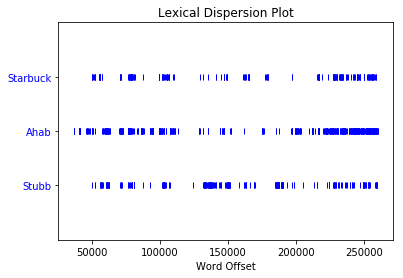

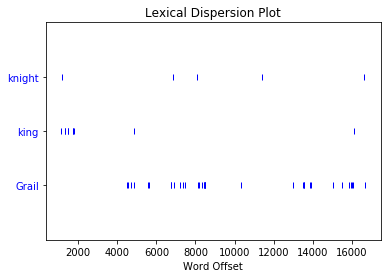

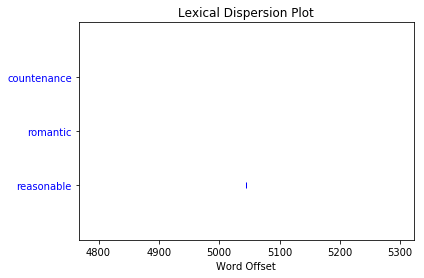

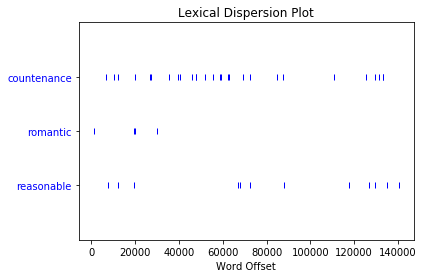

In [68]:
text1.dispersion_plot(['Starbuck','Ahab','Stubb'])
text6.dispersion_plot(['knight','king','Grail'])
text6.dispersion_plot(['countenance','romantic','reasonable'])
text2.dispersion_plot(['countenance','romantic','reasonable'])

In [ ]:
for n in range(10):
    uno = input()
    print(f'User: {uno}')
    print(f'Elisa: {chat.}')

Hello
User: Hello
Elisa: Hello, how are you feeling today?
Nice, thanks!
User: Nice, thanks!
Elisa: nice, thanks!.
And you?
User: And you?
Elisa: Why do you ask that?
I would like to know you more
User: I would like to know you more
Elisa: Could you explain why you would like to know me more?
To make a Turing test i think
User: To make a Turing test i think
Elisa: to make a turing test you think.
Do you think you can pass it?
User: Do you think you can pass it?
Elisa: Why do you ask that?
Why do YOU ask that?
User: Why do YOU ask that?
Elisa: Why do you think do me ask that?
Why not?
User: Why not?
Elisa: Why do you think not?
Hell yeah
User: Hell yeah
Elisa: I see.  And what does that tell you?
